<img src="tp3.png">

<h1 style="color: Crimson;" > <center> Compte Rendu TP3: CLUSTERING </center></h1>
<h3 style="color : #3A727F; text-align: right;">Réalisé par : Wissal FARJALLAH</h3>

<h3 style = "color:DarkCyan;">I. PARTIE THÉORIQUE</h3>

<h4>Clustering (ou partitionnement des données) : Cette méthode de classification non supervisée rassemble un ensemble d’algorithmes d’apprentissage dont le but est de regrouper entre elles des données non étiquetées présentant des propriétés similaires. Isoler ainsi des schémas ou des familles permet aussi de préparer le terrain pour l’application ultérieure d’algorithmes d’apprentissage supervisé (comme le KNN)
L'algorithme des Kmeans peut être utilisé pour effectuer une segmentation d'une image qui présente des zones de couleur relativement uniforme. On représente l'ensemble des pixels de l'image dans un espace à trois dimensions en se basant sur leurs composantes Rouge / Vert / bleu. On obtient ainsi un nuage de points sur lequel on applique l'algorithme des k-means</h4>
<br>
<h4>voici quelques exemples de segmentation des images avec l'algorithme de clustering </h4>

<img src="seg1.png"><img src="seg2.png">

<h3 style = "color:DarkCyan;"> II.PARTIE PRATIQUE </h3>

<h4> Dans la première partie , on s'interesse au a l'effet de clustering sur l'image en modifiant a chaque fois le nombre de cluster dans l'algorithme de k-means (cest un algothime de segmentation dans l'approche non supervisée de machine learning), on essai avec nombre de cluster = 2,3,4,5,6,7,8,9 et enfin 10 </h4>
<br>
<h4> Tout d'acord on va installer la bilbliothéque "OPEN-CV"</h4>

In [1]:
!pip install opencv-python

#### Puis on importe les bibliothéques nécessaires tel que : numpy ==> pour tout les opération mathématiques
#### pandas ==> pour l'affichge de tout ce qui est courbes et graphes
#### sklearn ==> pour l'accés au algorithme de machine learning comme K-mens 
#### skimage ==> pour tout ce qui est traitement des images
#### Et on applique k-means pour la segmentation comme on a montionné ci-dessus

In [7]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import skimage.io
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def segm(k):
    image= cv2.imread('covid.jpg')

    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))


    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

    cv2.imwrite('covid2.jpg', quant)
    return plt.imshow(quant)
cv2.imread('covid.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
interact(segm,k=widgets.IntSlider(min=2, max=10, step=1, value=2));

interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…

#### Les images segmentés pour générer automatiquement , mais l'image ci-dessous regroupe tout et resume tout.. 
#### On remarque que lorsque le nombre de cluster = 2 , on trouve les deux couleurs dominants dans l'image, et à chaque fois qu'on augmente le nombre de cluster, l'image segmentée sera plus proche à l'image originale 
#### ( nbre de cluster tend ves l'infini ==> image segmentée = image originale)

<img src="allSegments.png">

#### La deuxième partie est consacrée à l'image bruitée, on va ajouter quelques type de bruits à notre image dans le but de détérminer l'effet et les conséquences de ces bruits 
#### Pour cela on utilise la fonction **random_noise** du module **util** de la bibliothéque **skimage**.

In [16]:
import skimage.io
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
img_path="covid.jpg"
img = skimage.io.imread(img_path)/255.0

 

def plotnoise(mode):
    img_path="covid.jpg"
    img = skimage.io.imread(img_path)/255.0
    #plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

 
plt.figure(figsize=(18,24))
r=4
c=2
interact(plotnoise,mode=["Gaussian","Localvar","Poisson","Salt", "pepper", "s&p", "speckle",None]);

 

plt.show()


<Figure size 1296x1728 with 0 Axes>

interactive(children=(Dropdown(description='mode', options=('Gaussian', 'Localvar', 'Poisson', 'Salt', 'pepper…

#### Et dans la derniére partie on va essayer d'éliminer la bruit puis on fait la segmentation de chaque image et on compare les images segmentées obtenue avec celles de la premiére partie 
#### Tout d'abord on va éliminer la bruit des images
#### Pour accomplir cette tache, le module ***restoration*** de la bibliothéque ***skimage*** est neséssaire

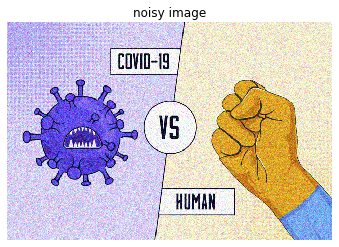

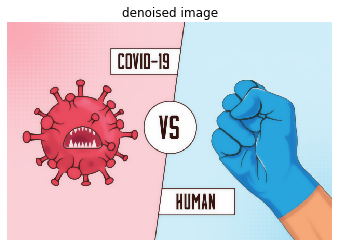

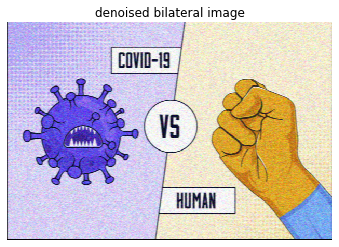

In [11]:
import skimage.io
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle
from skimage.restoration import denoise_bilateral



def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()


image_orig=cv2.imread('covid.jpg')
noisy_image = random_noise(image_orig)
show_image(noisy_image, 'noisy image')

# total variation filter denoising
denoised_image = denoise_tv_chambolle(img, weight=0.1, multichannel=True)
show_image(denoised_image, 'denoised image')


# bilateral filter denoising
denoised_bilateral_image = denoise_bilateral(noisy_image, multichannel=True)
show_image(denoised_bilateral_image, 'denoised bilateral image')


#### Dans la bibliothéque ***skimage*** on trouve deux célèbres fonctions pour elimier la bruit : denoise_tv_chambolle() ==> pour éliminer la variation totale de bruit & denoise_bilateral() ==> pour éliminer la bruit bilatérale 
#### Maintenant, on applique la segmentation sur les deux images resultants de l'élimination de bruit et on les comparent avec celles de la pemiére partie 
##### (on va segmenter seulement avec 2, 4 et 6 clusters)
#### Commancant par limage dont on élimine la bruit totale

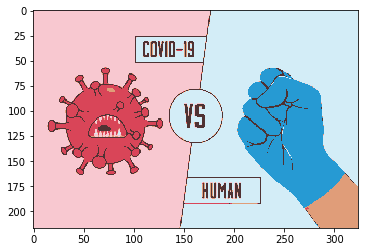

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import skimage

image= cv2.imread('denoised_image.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
cv2.imwrite('denoised_image_6.jpg', segmented_image)
# show the image
plt.imshow(segmented_image)
plt.show()

#### Passant maintenant à l'image dont on élimine la bruit bilatérale

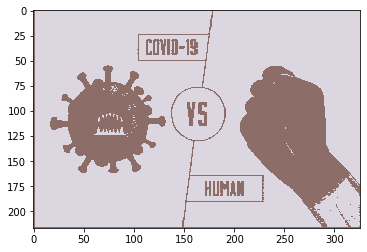

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import skimage

image= cv2.imread('denoised_bilatéral_image.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 2
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
cv2.imwrite('bilatéral_denoised_image_2.jpg', segmented_image)
# show the image
plt.imshow(segmented_image)

#### on a choisi de intérpreter et conclure cette partie par une image comparative et démenstative

<img src="final.png">

<h3 style = "color:DarkCyan;"> III.CONCLUSION GÉNÉRALE </h3>

#### **D'aprés ce TP on peut conclure que: **
#### *le clustering est une étape fondamentale dans data mining et l'exploitation des données pour determiner les couleurs dominants dans l'image
#### *lorqu'on augmente le nombre de clusters , l'image segmentée proche de l'image originale
#### *On peut varier le nombre de cluster selon l'application : par exemple si l'application est une reconnaissance des formes, les couleurs ne sont pas necessaires donc le nombre de cluster peut etre 3 ou 3
#### * il ya plusieurs types de bruits qui peuvent affecter l'image 
#### * la performance de clustering diminue lorsque l'image est bruité meme lorsqu'on essaie d'éliminer cette bruit